## DANA 2021
## Stock to flow and macroeconomic indicators for the Bitcoin price

### Ignacio

### 1. Introduction
#### 1.a) Scarcity in Bitcoin
Scarcity is a feature in assets that make its value time-resistant.

In [1]:
## fetch the Bitcoin Bitstamp price data
#api.dataset

In [86]:
## import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import seaborn as sns
sns.set_theme()

In [3]:
from datetime import datetime

In [109]:
## set plotting paramenters as default for the rest of the notebook
plt.rcParams["figure.figsize"] = [10,4]
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'legend.fontsize': 11})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'font.size': 15})

In [4]:
## query blockchain values
data0 = pd.read_csv("BTC-USD (1).csv")
data0.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-24,420.955994,425.549988,413.907013,424.954987,424.954987,67743696.0
1,2016-02-25,425.036987,427.718994,420.415009,424.544006,424.544006,70798000.0
2,2016-02-26,424.628998,432.152008,421.619995,432.152008,432.152008,61486000.0
3,2016-02-27,432.838989,434.230988,428.102997,432.519012,432.519012,41893600.0
4,2016-02-28,432.571014,435.683014,423.820007,433.503998,433.503998,53033400.0


In [5]:
## load bitstamp data
data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv")
data["Date"] = [datetime.utcfromtimestamp(int(ttt)) for ttt in data["Timestamp"]]
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020-12-30 23:56:00
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020-12-30 23:57:00
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020-12-30 23:58:00
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020-12-30 23:59:00
4727776,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061,2020-12-31 00:00:00


In [6]:
## collect daily or motnhly data
## data

def _daily_(x, cc="Date"):
    idx = []
    n, m = np.shape(x)  ## data dimensions
    for iidd, xi in enumerate(x[cc]):
        if (xi. hour == 0) and (xi.minute == 0) and (xi.second == 0):
            idx.append(iidd)
            
    df = x.iloc[idx]
    return df.reset_index().drop("index", axis=1)

## Calculate MAdata

In [7]:
Xday0 = _daily_(data)

In [8]:
## merge daily datasets
for ni, i in enumerate(data0["Date"]):
    if str(i) == str(Xday0["Date"][Xday0["Date"].index[-1]])[0:10]:
        idx_merge = i
        break

        
## change column name
Xday0.rename(columns={"Volume_(Currency)":"Volume"}, inplace = True)
a1 = Xday0[["Date", "Close", "Volume"]]
a2 = data0.iloc[range(ni+1, data0.index[-1]+1)][["Date", "Close", "Volume"]]

Xday = pd.concat([a1, a2])
Xday = Xday.reset_index().drop("index", axis=1)

In [42]:
## calcuate pi cycle 350
def pi_cycle(dat, cc="Close"):
    x = dat[cc]
    lng = 350
    srt = 111
    
    L, S = [np.NaN]*lng, [np.NaN]*srt
    
    ## calculate short and long cycles
    for ll in range(len(x[lng:])):
        li = np.sum(x[ll:ll+lng])
        L.append(li)
        
    for ss in range(len(x[srt:])):
        si = np.sum(x[ss:ss+srt])
        S.append(si)
    
    return np.array(L)*2/lng, np.array(S)/srt

In [43]:
## compute daily pi cylce 350
L, S = pi_cycle(Xday)
Xday["long_Pi"] = L
Xday["short_Pi"] = S

In [ ]:
## save as csv
#Xday.to_csv("Xday.csv")

Text(0.5, 1.0, 'Pi cycle')

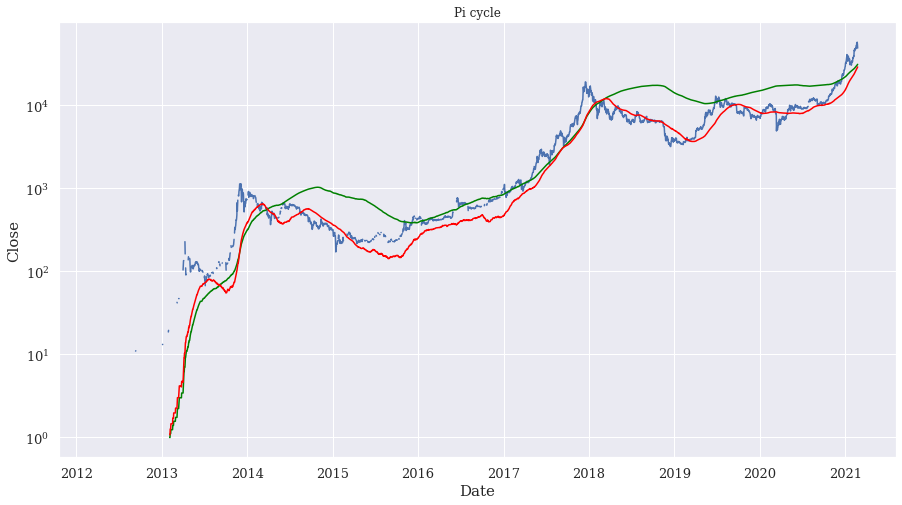

In [111]:
## seaborn plot
i0 = 0
f0 = -1

fig1, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
sns.lineplot(data=Xday[i0+400:f0], y="long_Pi", x="Date", color="green")
sns.lineplot(data=Xday[i0+400:f0], y="short_Pi", x="Date", color="red")
ax.set(yscale="log")
ax.set_title("Pi cycle")

In [148]:
## price velocity and acceleration

def _dynamics_(dat, cc="Close"):
    xi = dat[cc]
    v = [np.nan]
    a = [np.nan]
    
    v += list(np.diff(xi))
    a += list(np.diff(v))
    
    return np.array(v), np.array(a)

In [149]:
## compute velocity and acceleration
v, a = _dynamics_(Xday)
Xday["Velocity"] = v
Xday["Acceleration"] = a

## magnitude
Xday["V2"] = v*v
Xday["A2"] = a*a

In [150]:
Xday

,Date,Close,Volume,long_Pi,short_Pi,Velocity,Acceleration,V2,A2
0,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3334,2021-02-20,56099.519531,6.814546e+10,30325.623534,27822.559626,211.386718,-3996.949220,4.468434e+04,1.597560e+07
3335,2021-02-21,57539.945313,5.189759e+10,30593.873131,28204.189621,1440.425782,1229.039064,2.074826e+06,1.510537e+06
3336,2021-02-22,54207.320313,9.205242e+10,30871.890019,28598.433543,-3332.625000,-4773.050782,1.110639e+07,2.278201e+07
3337,2021-02-23,48824.425781,1.061025e+11,31135.661278,28964.431384,-5382.894532,-2050.269532,2.897555e+07,4.203605e+06


Text(0.5, 1.0, 'Velocity')

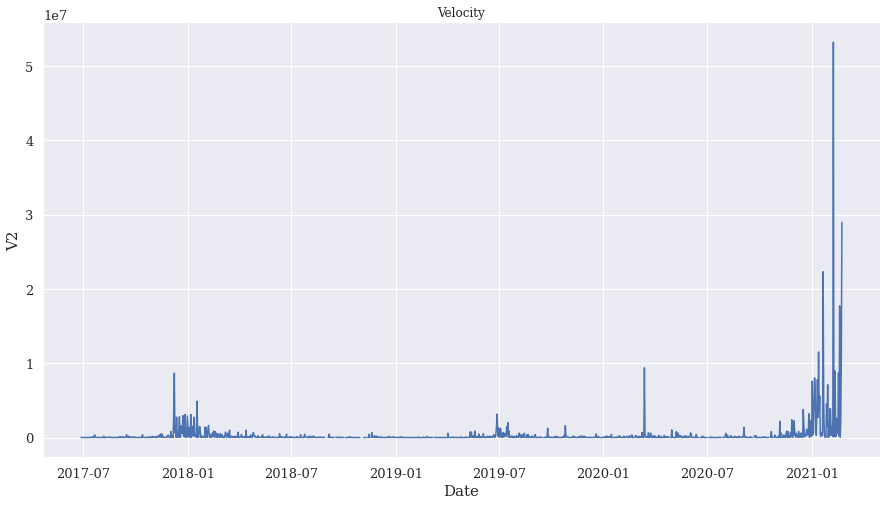

In [152]:
## plot velocity
i0 = 2000
f0 = -1

fig2, ax = plt.subplots(figsize=(15,8))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=Xday[i0:f0], y="V2", x="Date")
ax.set_title("Velocity")